In [1]:
import pandas as pd
import os
import json

df_10k = pd.read_csv('../data/askme-qa/askme-10k.csv')
df_full = pd.read_csv('../data/askme-qa/askme-full-balanced.csv')
df_full.head()

,_sa_instance_state_question,context,id_question,author_id,upvote,turns,text_question,paragraph_id,scope,timestamp,...,author_id_answer,question_id,timestamp_answer,_sa_instance_state_rating,answer_id,id_rating,timestamp_rating,author_id_rating,text_rating,value
0,<sqlalchemy.orm.state.InstanceState object at ...,"In an article about 'Valkyria Chronicles III',...",15525,1,0,multi,Who are the two military units that serve as t...,0,single-paragraph,2024-04-27 03:03:59,...,2,15525,2024-04-27 03:04:37,<sqlalchemy.orm.state.InstanceState object at ...,31032,31028,2024-04-27 03:04:42,3,The answer is fully accurate and detailed. It ...,5
1,<sqlalchemy.orm.state.InstanceState object at ...,"In an article about 'Valkyria Chronicles III',...",15526,1,0,multi,What is the original Japanese title of the gam...,0,single-paragraph,2024-04-27 03:03:59,...,2,15526,2024-04-27 03:04:45,<sqlalchemy.orm.state.InstanceState object at ...,31033,31029,2024-04-27 03:04:51,3,The answer provided is fully accurate and deta...,5
2,<sqlalchemy.orm.state.InstanceState object at ...,"In an article about 'Valkyria Chronicles III',...",15524,1,0,multi,What is the original Japanese title of the gam...,0,single-paragraph,2024-04-27 03:03:59,...,2,15524,2024-04-27 03:04:02,<sqlalchemy.orm.state.InstanceState object at ...,31029,31025,2024-04-27 03:04:12,3,The answer provided is fully accurate and deta...,5
3,<sqlalchemy.orm.state.InstanceState object at ...,"In an article about 'Valkyria Chronicles III',...",15527,1,0,multi,Who are the two military units that serve as t...,0,single-paragraph,2024-04-27 03:03:59,...,2,15527,2024-04-27 03:05:16,<sqlalchemy.orm.state.InstanceState object at ...,31036,31032,2024-04-27 03:05:22,3,The answer is fully accurate and detailed. It ...,5
4,<sqlalchemy.orm.state.InstanceState object at ...,"In an article about 'Valkyria Chronicles III',...",15542,1,0,multi,Which artist performed the opening theme song ...,1,single-paragraph,2024-04-27 03:10:58,...,2,15542,2024-04-27 03:11:16,<sqlalchemy.orm.state.InstanceState object at ...,31055,31050,2024-04-27 03:11:22,3,The answer is fully accurate and detailed. It ...,5


In [5]:
import nltk
from collections import Counter
from nltk.util import ngrams
from tqdm.notebook import tqdm

nltk.download('punkt')

def get_top_ngrams(questions, n, top_k=32):
    ngram_counter = Counter()
    for question in questions:
        tokens = nltk.word_tokenize(question.lower())
        ngram_counter.update(ngrams(tokens, n))
    return ngram_counter.most_common(top_k)

questions_10k = df_10k['text_question'].tolist()
questions_full = df_full['text_question'].tolist()

df_10k_ngram = pd.DataFrame(columns=[f'rank-{i+1}' for i in range(32)], index=[f'{i+1}-gram' for i in range(8)])
df_full_ngram = pd.DataFrame(columns=[f'rank-{i+1}' for i in range(32)], index=[f'{i+1}-gram' for i in range(8)])

if os.path.exists('top_ngrams_10k.csv'):
    df_10k_ngram = pd.read_csv('top_ngrams_10k.csv', index_col=0)
else: 
    for n in tqdm(range(1, 9), desc="Processing n-grams"):
        top_ngrams_10k = get_top_ngrams(questions_10k, n)
        for rank, (ngram, freq) in enumerate(top_ngrams_10k):
            ngram_str = ' '.join(ngram)
            df_10k_ngram.at[f'{n}-gram', f'rank-{rank+1}'] = (ngram_str, freq)
        print(f"Top {n}-grams 10k: {top_ngrams_10k[:5]}")
        df_10k_ngram.to_csv('top_ngrams_10k.csv', index=True)

if os.path.exists('top_ngrams_full.csv'):
    df_full_ngram = pd.read_csv('top_ngrams_full.csv', index_col=0)
else:
    for n in tqdm(range(1, 9), desc="Processing n-grams"):
        top_ngrams_full = get_top_ngrams(questions_full, n)
        for rank, (ngram, freq) in enumerate(top_ngrams_full):
            ngram_str = ' '.join(ngram)
            df_full_ngram.at[f'{n}-gram', f'rank-{rank+1}'] = (ngram_str, freq)
        print(f"Top {n}-grams full: {top_ngrams_full[:5]}")
        df_full_ngram.to_csv('top_ngrams_full.csv', index=True)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/yuehengzhang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Processing n-grams:   0%|          | 0/8 [00:00<?, ?it/s]

Top 1-grams full: [(('the',), 1533474), (('?',), 1128224), (('of',), 860817), (('what',), 679814), (('in',), 636599)]
Top 2-grams full: [(('of', 'the'), 258066), (('in', 'the'), 168730), (('what', 'is'), 150533), (('is', 'the'), 140098), (('was', 'the'), 106880)]
Top 3-grams full: [(('what', 'is', 'the'), 117373), (('what', 'was', 'the'), 73685), (('what', 'type', 'of'), 65208), ((',', 'and', 'what'), 44846), (('in', 'what', 'year'), 38415)]
Top 4-grams full: [(('in', 'what', 'year', 'did'), 21637), (('the', 'name', 'of', 'the'), 18206), (('the', 'title', 'of', 'the'), 15723), (('in', 'what', 'year', 'was'), 14999), (('what', 'is', 'the', 'name'), 14970)]
Top 5-grams full: [(('what', 'is', 'the', 'name', 'of'), 14375), (('is', 'the', 'name', 'of', 'the'), 13653), (('what', 'is', 'the', 'title', 'of'), 12461), (('is', 'the', 'title', 'of', 'the'), 10353), (('what', 'was', 'the', 'title', 'of'), 6819)]
Top 6-grams full: [(('what', 'is', 'the', 'name', 'of', 'the'), 13645), (('what', 'is'

/tmp/ipykernel_3046711/2830446822.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_3046711/2830446822.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_3046711/2830446822.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_3046711/2830446822.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_3046711/2830446822.py:32: UserWarning: set_ticklabels() should on

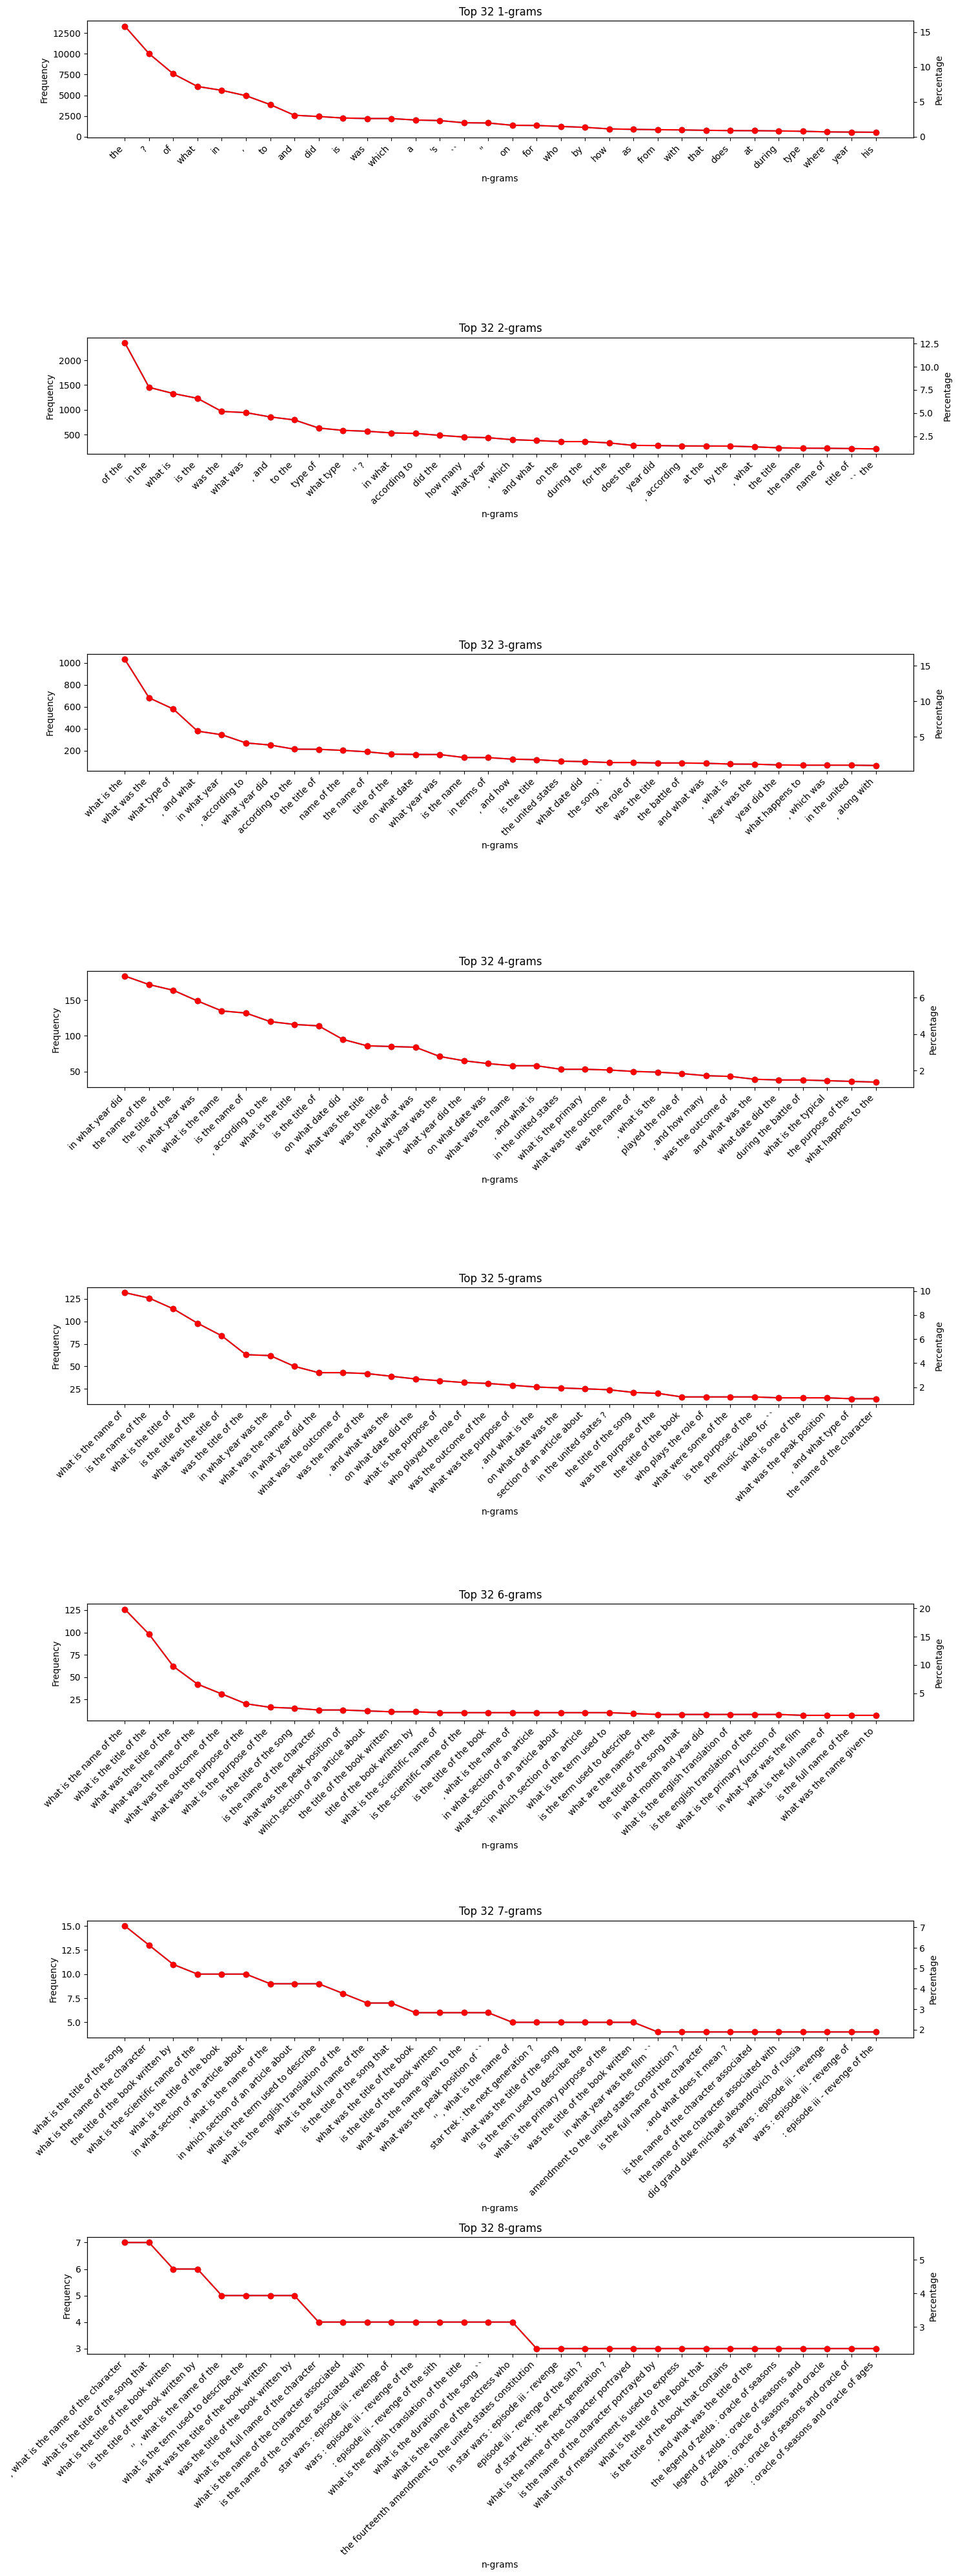

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df_10k_ngram = pd.read_csv('top_ngrams_10k.csv', index_col=0)

def parse_ngram_freq(cell):
    if isinstance(cell, str):
        ngram, freq = eval(cell)
        return ngram, freq
    return None, 0

fig, axs = plt.subplots(8, 1, figsize=(15, 40))
for i in range(8):
    n = i + 1
    ngram_labels = []
    frequencies = []
    
    for col in df_10k_ngram.columns:
        ngram, freq = parse_ngram_freq(df_10k_ngram.at[f'{n}-gram', col])
        if ngram:
            ngram_labels.append(ngram)
            frequencies.append(freq)

    total_freq = sum(frequencies)
    ratios = [freq / total_freq * 100 for freq in frequencies]
    
    ax1 = axs[i]
    ax1.plot(ngram_labels, frequencies, marker='o', label='Frequency')
    ax1.set_title(f'Top 32 {n}-grams')
    ax1.set_xlabel('n-grams')
    ax1.set_ylabel('Frequency')
    ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
    
    ax2 = ax1.twinx()
    ax2.plot(ngram_labels, ratios, marker='o', color='r', label='Percentage')
    ax2.set_ylabel('Percentage')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3046711/2255723754.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_3046711/2255723754.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_3046711/2255723754.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_3046711/2255723754.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_3046711/2255723754.py:23: UserWarning: set_ticklabels() should on

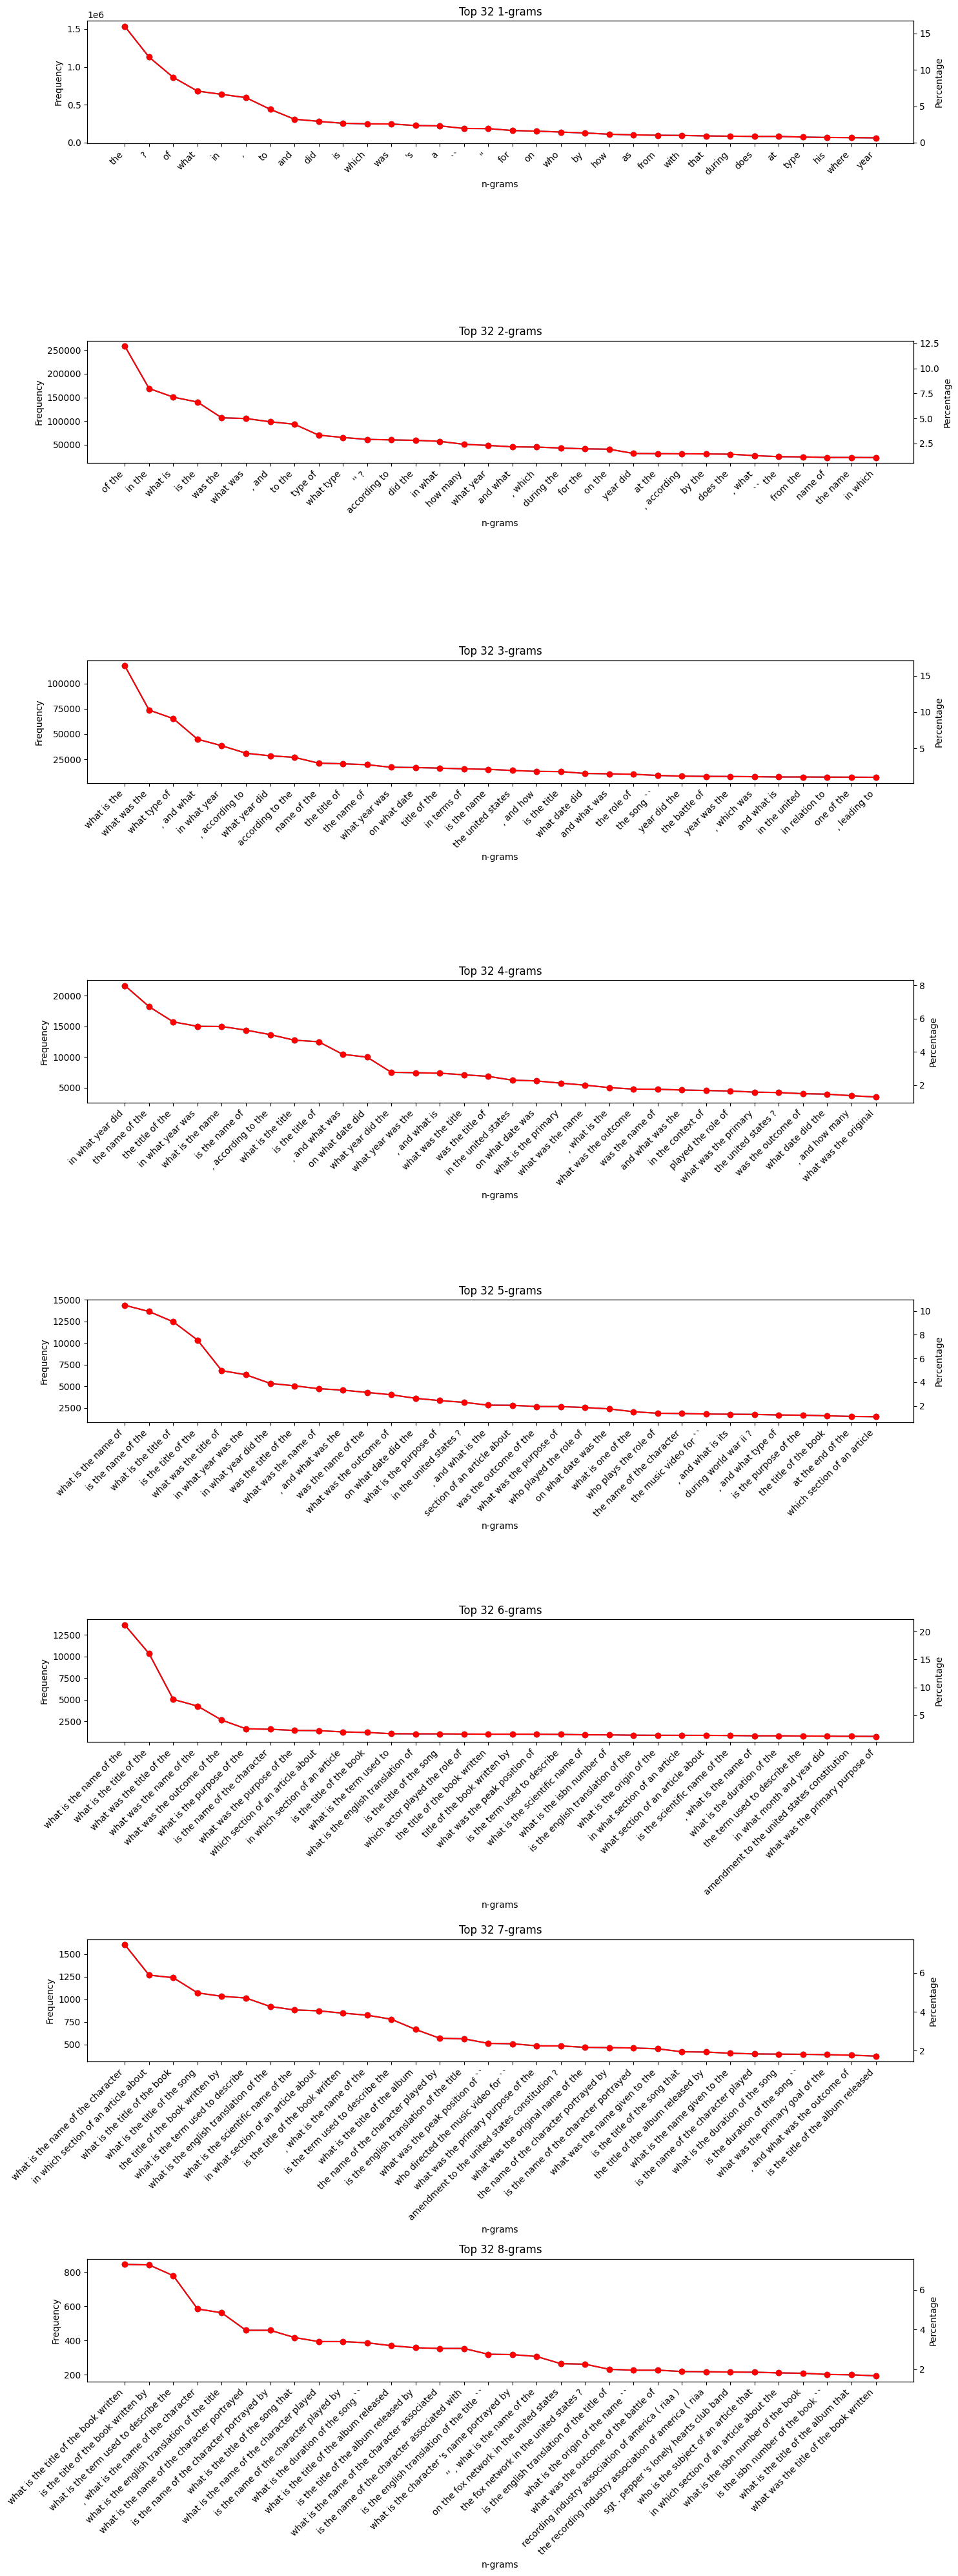

In [7]:
df_full_ngram = pd.read_csv('top_ngrams_full.csv', index_col=0)

fig, axs = plt.subplots(8, 1, figsize=(15, 40))
for i in range(8):
    n = i + 1
    ngram_labels = []
    frequencies = []
    
    for col in df_full_ngram.columns:
        ngram, freq = parse_ngram_freq(df_full_ngram.at[f'{n}-gram', col])
        if ngram:
            ngram_labels.append(ngram)
            frequencies.append(freq)

    total_freq = sum(frequencies)
    ratios = [freq / total_freq * 100 for freq in frequencies]
    
    ax1 = axs[i]
    ax1.plot(ngram_labels, frequencies, marker='o', label='Frequency')
    ax1.set_title(f'Top 32 {n}-grams')
    ax1.set_xlabel('n-grams')
    ax1.set_ylabel('Frequency')
    ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
    
    ax2 = ax1.twinx()
    ax2.plot(ngram_labels, ratios, marker='o', color='r', label='Percentage')
    ax2.set_ylabel('Percentage')
plt.tight_layout()
plt.show()